In [2]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn import svm
from sklearn.metrics import accuracy_score

**Data Analysis**

In [3]:
diabetes_database=pd.read_csv("/content/diabetes.csv")

In [4]:
diabetes_database.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [5]:
diabetes_database.shape

(768, 9)

In [6]:
diabetes_database.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [7]:
import matplotlib.pyplot as plt

In [8]:
label_counts=diabetes_database['Outcome'].value_counts()

In [9]:
plt.figure(figsize=(8,6))

<Figure size 800x600 with 0 Axes>

<Figure size 800x600 with 0 Axes>

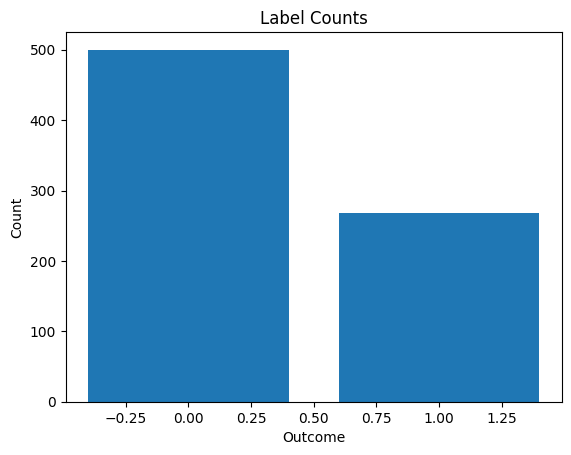

In [10]:
plt.bar(label_counts.index,label_counts.values)
plt.xlabel('Outcome')
plt.ylabel('Count')
plt.title('Label Counts')
plt.show()

In [11]:
label_counts=diabetes_database['Outcome'].value_counts()
label_counts

,count
Outcome,
0,500
1,268


In [12]:
df_class_0=diabetes_database[diabetes_database['Outcome']==0]
df_class_1=diabetes_database[diabetes_database['Outcome']==1]

In [13]:
df_class_0=df_class_0.sample(len(df_class_1))

In [14]:
diabetes_database=pd.concat([df_class_0,df_class_1])

In [15]:
label_counts=diabetes_database['Outcome'].value_counts()
label_counts

,count
Outcome,
0,268
1,268


In [16]:
x=diabetes_database.drop(columns='Outcome',axis=1)


In [17]:
y=diabetes_database['Outcome']

In [18]:
X_train, X_test, Y_train, Y_test = train_test_split(x, y, test_size=0.2, random_state=2)

In [19]:
print(x.shape, X_train.shape, X_test.shape)

(536, 8) (428, 8) (108, 8)


In [20]:
model=svm.SVC(kernel='linear')

In [21]:
model.fit(X_train, Y_train)

SVC(kernel='linear')

In [22]:
X_train_prediction = model.predict(X_train)
training_data_accuracy = accuracy_score(X_train_prediction, Y_train)

In [23]:
print("Accuracy of training data: ", training_data_accuracy)

Accuracy of training data:  0.7570093457943925


In [24]:
X_test_prediction=model.predict(X_test)
test_data_accuracy=accuracy_score(X_test_prediction,Y_test)

In [25]:
print(f"Accuracy of test data: {test_data_accuracy}")

Accuracy of test data: 0.7407407407407407


In [26]:
inputs=(6, 148, 72, 35, 0, 33.6, 0.627, 50)

In [27]:
inputs=np.asarray(inputs)

In [28]:
inputs=inputs.reshape(1,-1)

In [29]:
prediction=model.predict(inputs)

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


In [30]:
print(prediction)

[1]


In [31]:
if prediction[0]==1:
  print(f"The patient is diabetic")
else:
  print(f"The patient is not diabetic")

The patient is diabetic


In [32]:
import pickle

In [33]:
filename="diabetes_model.pkl"
pickle.dump(model,open(filename,'wb'))

In [34]:
!pip install fastapi
!pip install uvicorn
!pip install pickle5
!pip install pydantic
!pip install scikit-learn
!pip install requests
!pip install pypi-json
!pip install pyngrok
!pip install nest-asyncio

  Using cached pickle5-0.0.11.tar.gz (132 kB)
  Preparing metadata (setup.py) ... done
  error: subprocess-exited-with-error
  
  × python setup.py bdist_wheel did not run successfully.
  │ exit code: 1
  ╰─> See above for output.
  
  note: This error originates from a subprocess, and is likely not a problem with pip.
  ERROR: Failed building wheel for pickle5
  Running setup.py clean for pickle5
Failed to build pickle5
ERROR: ERROR: Failed to build installable wheels for some pyproject.toml based projects (pickle5)


In [35]:
from fastapi import FastAPI
from pydantic import BaseModel
import pickle
import json
import uvicorn
from pyngrok import ngrok
from fastapi.middleware.cors import CORSMiddleware
import nest_asyncio

In [36]:
app=FastAPI()

In [37]:
origins=['*']

In [38]:
app.add_middleware(
    CORSMiddleware,
    allow_origins=origins,
    allow_credentials=True,
    allow_methods=["*"],
    allow_headers=["*"],
)

In [39]:
class model_input(BaseModel):
  Pregnancies:int
  Glucose:int
  BloodPressure:int
  SkinThickness:int
  Insulin:int
  BMI:float
  DiabetesPedigreeFunction:float
  Age:int

In [40]:
diabetes_model=pickle.load(open('/content/diabetes_model.pkl',"rb"))

In [48]:
@app.post('/prediction')
def diabetes_prediction(input_paras: model_input):
  input_data=input_paras.json()
  input_dictionary=json.loads(input_data)

  preg=input_dictionary.Pregnancies
  glucose=input_dictionary.Glucose
  bp=input_dictionary.BloodPressure
  st=input_dictionary.SkinThickness
  insulin=input_dictionary.Insulin
  bmi=input_dictionary.BMI
  dpf=input_dictionary.DiabetesPedigreeFunction
  age=input_dictionary.Age

  input_values=[preg, glucose, bp, st, insulin, bmi, dpf, age]
  input_values=np.asarray(input_values)
  input_values=input_values.reshape(1,-1)

  prediction=diabetes_model.predict(input_values)

  if prediction[0]==1:
    return "The patient is diabetic"
  else:
    return "The patient is not diabetic"


In [49]:
!ngrok authtoken 2fC5wTVcZTauBddvaNnvkVtGTre_5WECsMB3SQJDPSb3dBMhf

Authtoken saved to configuration file: /root/.config/ngrok/ngrok.yml


In [50]:
ngrok_tunnel=ngrok.connect(8000)
print('Public URL: ', ngrok_tunnel.public_url)
nest_asyncio.apply()
uvicorn.run(app, port=8000)

Public URL:  https://f4e56ad4b0df.ngrok-free.app


RuntimeError: asyncio.run() cannot be called from a running event loop